# Homework Assignment 8

**Package Setup**


In [ ]:
!pip install turicreate
!pip install spaCy
!pip install pymongo
!pip install geopandas
!pip install descartes
!pip install geopy
!pip install folium
!pip install imageio

# Run this to make cartopy work with colab
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!pip install --no-binary shapely shapely --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
proj-data

**Question 1:** Select a book or a movie's subtitle, and find the locations that appear in the book/movie. Then, draw these locations on a map (at least 10 locations) (30pt). Connect the discovered locations with lines according to their order of appearance
in the book. For example, if location B appeared immediately after location A, then draw a line connecting locations A and B (20pt).

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/mark_twain

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/mark_twain’: File exists


In [ ]:
!wget -O ./datasets/mark_twain/mark_twain.txt http://www.gutenberg.org/files/245/245-0.txt
!python -m spacy download en_core_web_lg # remember to restart the runtime

--2022-05-27 00:01:07--  http://www.gutenberg.org/files/245/245-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/files/245/245-0.txt [following]
--2022-05-27 00:01:07--  https://www.gutenberg.org/files/245/245-0.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 843290 (824K) [text/plain]
Saving to: ‘./datasets/mark_twain/mark_twain.txt’

./datasets/mark_twa 100%[===================>] 823.53K  --.-KB/s    in 0.1s    

2022-05-27 00:01:08 (6.94 MB/s) - ‘./datasets/mark_twain/mark_twain.txt’ saved [843290/843290]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Down

In [ ]:
import spacy
import operator

nlp = spacy.load('en_core_web_lg')


def get_locations_from_text(text):
    locations_dict= {}

    #using spaCy to get entities
    doc = nlp(text)

    for entity in doc.ents:
        label = entity.label_
        if label not in {'LOC', 'GPE'}:
            continue
        loc = entity.text.lower().strip()
        if len(loc) < 2:
            continue
        if loc not in locations_dict:
            locations_dict[loc] = 0
        locations_dict[loc] += 1
    return locations_dict

twain_full_work_path = "./datasets/mark_twain/mark_twain.txt"
txt = open(twain_full_work_path).read()
locations_dict = get_locations_from_text(txt)
locations_dict = {k:v for k,v in  locations_dict.items() if v>3}
print(sorted(locations_dict.items(), key=operator.itemgetter(1), reverse=True)[:20])
print(f"Number of locations {len(locations_dict.keys())}")

[('mississippi', 121), ('new orleans', 102), ('st. louis', 80), ('cairo', 31), ('vicksburg', 27), ('memphis', 26), ('missouri', 23), ('arkansas', 23), ('south', 23), ('earth', 20), ('the\nriver', 19), ('cincinnati', 17), ('the united states', 17), ('orleans', 16), ('texas', 15), ('ohio', 15), ('new', 15), ('st. paul', 15), ('illinois', 14), ('murel', 13)]
Number of locations 79


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Data Science Education App") #  Using OpenStreetMap Nominatim
location = geolocator.geocode("the missouri river")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

The Blue Line, 529, Walnut Street, River Market, Kansas City, Jackson County, Missouri, 64106, United States
(39.1077556, -94.5811909)
{'place_id': 56172821, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 4956588012, 'boundingbox': ['39.1077056', '39.1078056', '-94.5812409', '-94.5811409'], 'lat': '39.1077556', 'lon': '-94.5811909', 'display_name': 'The Blue Line, 529, Walnut Street, River Market, Kansas City, Jackson County, Missouri, 64106, United States', 'class': 'amenity', 'type': 'bar', 'importance': 0.30100000000000005, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/food_bar.p.20.png'}


In [ ]:
from functools import lru_cache
from scipy.interpolate import interp1d # for transfaering font size
import time

@lru_cache(maxsize=256)
def get_location(loc):
    time.sleep(1)
    return geolocator.geocode(loc)

In [ ]:
import geopandas

!mkdir ./datasets/ne_50m_admin_1_states_provinces/
!wget -O ./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.zip https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip
!unzip ./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.zip  -d ./datasets/ne_50m_admin_1_states_provinces/

shp_path = "./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp"

#reading states data from shape file
gdf = geopandas.read_file(shp_path)
gdf

mkdir: cannot create directory ‘./datasets/ne_50m_admin_1_states_provinces/’: File exists
--2022-05-27 00:03:03--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip [following]
--2022-05-27 00:03:03--  https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving naciscdn.org (naciscdn.org)... 13.226.52.56, 13.226.52.2, 13.226.52.63, ...
Connecting to naciscdn.org (naciscdn.org)|13.226.52.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 911408 (890K) [application/zip]
Saving to: ‘./datasets/ne_50m_admin_1_states_provinces/ne_50m_adm

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,AUS-2651,2651,AU-WA,None,AU,6,Western Australia,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((113.13181 -25.95199, 113.14823..."
1,Admin-1 scale rank,2,AUS-2650,2650,AU-NT,None,AU,6,Northern Territory,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((129.00196 -25.99901, 129.00196..."
2,Admin-1 scale rank,2,AUS-2655,2655,AU-SA,None,AU,3,South Australia,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((129.00196 -31.69266, 129.00196..."
3,Admin-1 scale rank,2,AUS-2657,2657,AU-QLD,None,AU,5,Queensland,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((138.00196 -25.99901, 138.00174..."
4,Admin-1 scale rank,2,AUS-2660,2660,AU-TAS,None,AU,5,Tasmania,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((147.31246 -43.28038, 147.34238..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,Admin-1 scale rank,2,ZAF-1209,1209,ZA-MP,None,ZA,1,Mpumalanga,Eastern Transvaal,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.82801 -23.96383, 31.85829 -24.040..."
290,Admin-1 scale rank,2,ZAF-1210,1210,ZA-LP,None,ZA,1,Limpopo,Noordelike Provinsie|Northern Transvaal|Northe...,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.82801 -23.96383, 31.77995 -23.965..."
291,Admin-1 scale rank,2,ZAF-1216,1216,ZA-NL,None,ZA,1,KwaZulu-Natal,Natal and Zululand,...,None,None,None,None,None,None,None,None,None,"POLYGON ((31.27399 -27.23839, 31.46953 -27.295..."
292,Admin-1 scale rank,2,ZAF-1926,1926,ZA-EC,None,ZA,1,Eastern Cape,Oos-Kaap,...,None,None,None,None,None,None,None,None,None,"POLYGON ((29.01439 -29.97624, 29.11562 -30.078..."


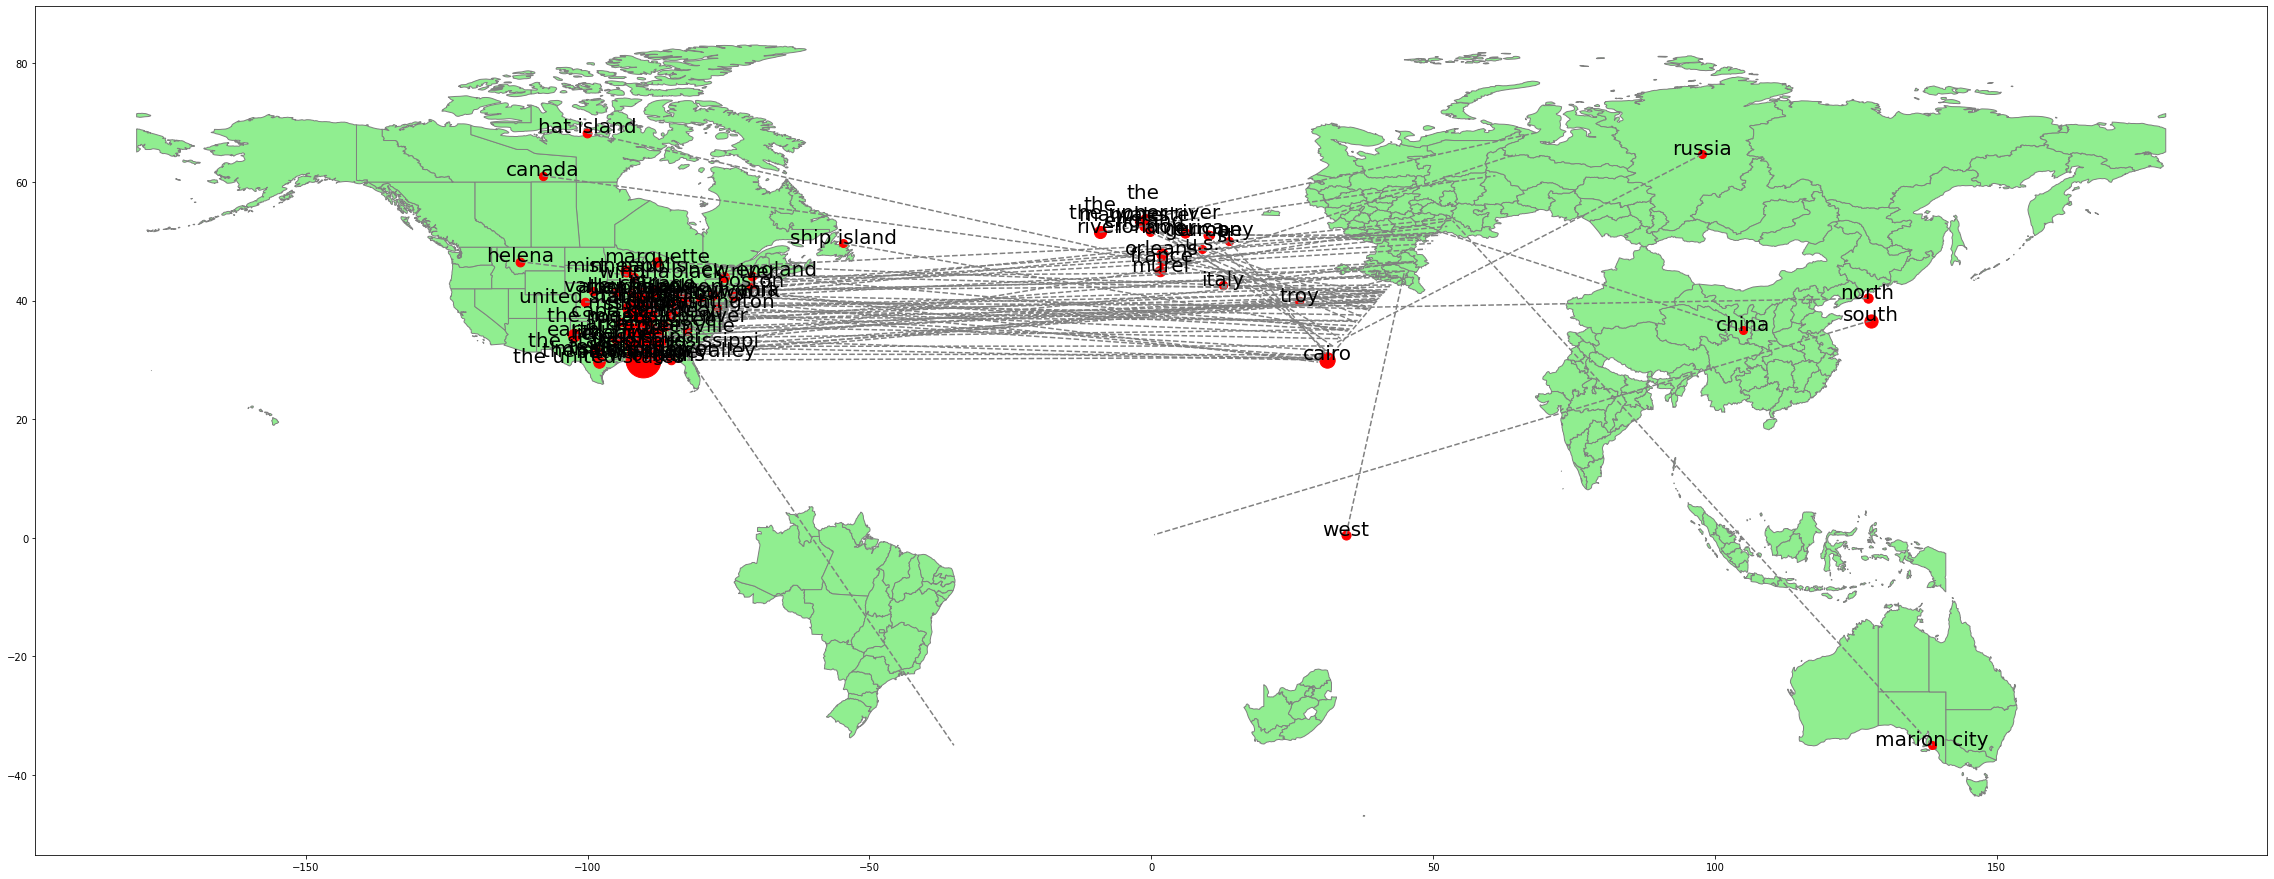

In [ ]:
from typing_extensions import Annotated
import matplotlib.pyplot as plt
%matplotlib inline


#reading states data from shape file
gdf = geopandas.read_file(shp_path)
# gdf = gdf[gdf['iso_a2'] == 'US'] # selecting only US states wihtout Alaska & Hawaii
# gdf = gdf[gdf['name'].apply(lambda n: n not in {'Alaska', 'Hawaii'})]
# #Let's add states name # see also https://stackoverflow.com/questions/38899190/geopandas-label-polygons
# gdf['repres_points'] = gdf['geometry'].apply(lambda x: x.representative_point())

fig, ax = plt.subplots(figsize=(40,40))
gdf.plot(ax=ax, color='lightgreen', edgecolor='gray')

m = interp1d([4,max(locations_dict.values())],[8,40])


for loc, v in locations_dict.items():
    location = get_location(loc)
    if location is None:
        continue
    # if not (-120 < location.longitude < -65) or not (57>location.latitude  > 25):
    #     print(f"Skipping plottin {location}: {(location.latitude, location.longitude)} ")
    #     continue


    plt.plot(location.longitude,location.latitude, marker='o', color='red', markersize=m(v))
    plt.annotate(s=loc, xy=(location.longitude,location.latitude),horizontalalignment='center', fontsize=20,color="black")

for loc_idx in range(0, len(locations_dict.keys()) - 1):
    loc = list(locations_dict.keys())[loc_idx]
    next_loc = list(locations_dict.keys())[loc_idx + 1]
    location = get_location(loc)
    next_location = get_location(next_loc)
    if location is not None and next_location is not None:
      #if (-120 < location.longitude < -65) and (57>location.latitude  > 25) and (-120 < next_location.longitude < -65) and (57>next_location.latitude  > 25):
        plt.plot([next_location.longitude, location.latitude], [next_location.latitude, location.latitude], color='gray', linestyle='--')



**Question 2:** Select a country's' statistic from the [World Development Indicators dataset](https://www.kaggle.com/worldbank/world-development-indicators) (Please notice there are several files in the dataset, such as _Indicators.csv_).
Then, create a choropleth map displaying how the selected statistics changed over time (15pt)
    
**Bonus:** Create a short animation that displays how the chosen statistics changed over time (15pt)

In [ ]:
!pip install pycountry
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"","key":""}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kaggle
!mkdir ./datasets/statistics

mkdir: cannot create directory ‘./datasets/statistics’: File exists


In [ ]:
!kaggle datasets list -s 'World Development Indicators'

ref                                                               title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggle/world-development-indicators                               World Development Indicators                        369MB  2017-05-01 17:50:44          61571       1597  0.7647059        
theworldbank/world-development-indicators                         World Development Indicators                        130MB  2019-05-16 20:20:16           3796        186  0.7058824        
bigquery/worldbank-wdi                                            World Development Indicators (WDI) Data                0B  2018-08-27 19:58:40              0        145  0.64705884       
danevans/world-bank-wdi-212-health-systems        

In [ ]:
!kaggle datasets download -d kaggle/world-development-indicators     -p ./datasets/
!unzip ./datasets/*.zip  -d ./datasets/statistics/

world-development-indicators.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/case-data-from-san-francisco-311.zip
caution: filename not matched:  ./datasets/world-development-indicators.zip


In [ ]:
import turicreate as tc
sf = tc.SFrame.read_csv('./datasets/statistics/Indicators.csv')
sf

Finished parsing file /content/datasets/statistics/Indicators.csv

Parsing completed. Parsed 100 lines in 2.01125 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 528165 lines. Lines per second: 298737

Read 3128826 lines. Lines per second: 420441

Finished parsing file /content/datasets/statistics/Indicators.csv

Parsing completed. Parsed 5656458 lines in 11.442 secs.

CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Arab World,ARB,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,133.56090740552298
Arab World,ARB,Age dependency ratio (%of working-age ...,SP.POP.DPND,1960,87.7976011532547
Arab World,ARB,"Age dependency ratio, old(% of working-age ...",SP.POP.DPND.OL,1960,6.634579191565161
Arab World,ARB,"Age dependency ratio,young (% of working-age ...",SP.POP.DPND.YG,1960,81.02332950839141
Arab World,ARB,Arms exports (SIPRI trendindicator values) ...,MS.MIL.XPRT.KD,1960,3000000.0
Arab World,ARB,Arms imports (SIPRI trendindicator values) ...,MS.MIL.MPRT.KD,1960,538000000.0
Arab World,ARB,"Birth rate, crude (per1,000 people) ...",SP.DYN.CBRT.IN,1960,47.697888095096395
Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,59563.9892169935
Arab World,ARB,CO2 emissions (metrictons per capita) ...,EN.ATM.CO2E.PC,1960,0.6439635478877049
Arab World,ARB,CO2 emissions fromgaseous fuel consumption ...,EN.ATM.CO2E.GF.ZS,1960,5.041291753975099


In [ ]:
sf = sf.filter_by(['SP.ADO.TFRT'], 'IndicatorCode')
sf

CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Arab World,ARB,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,133.56090740552298
Caribbean small states,CSS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,162.871211572184
Central Europe and theBaltics ...,CEB,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,46.716751611392
East Asia & Pacific (allincome levels) ...,EAS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,66.0159744792058
East Asia & Pacific(developing only) ...,EAP,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,75.0436305499244
Euro area,EMU,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,27.301838429626603
Europe & Central Asia(all income levels) ...,ECS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,42.0300522262526
Europe & Central Asia(developing only) ...,ECA,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,62.243602066685
European Union,EUU,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,38.9987768165909
Fragile and conflictaffected situations ...,FCS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,141.09417161608


In [ ]:
sf = sf.filter_by(['Adolescent fertility rate (births per 1,000 women ages 15-19)'], 'IndicatorName')
sf

CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
Arab World,ARB,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,133.56090740552298
Caribbean small states,CSS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,162.871211572184
Central Europe and theBaltics ...,CEB,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,46.716751611392
East Asia & Pacific (allincome levels) ...,EAS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,66.0159744792058
East Asia & Pacific(developing only) ...,EAP,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,75.0436305499244
Euro area,EMU,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,27.301838429626603
Europe & Central Asia(all income levels) ...,ECS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,42.0300522262526
Europe & Central Asia(developing only) ...,ECA,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,62.243602066685
European Union,EUU,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,38.9987768165909
Fragile and conflictaffected situations ...,FCS,"Adolescent fertility rate(births per 1,000 women ...",SP.ADO.TFRT,1960,141.09417161608


In [ ]:
import pycountry
import plotly_express as px

def get_country_to_alpha3(name):
    try:
        return pycountry.countries.get(name=name).alpha_3
    except:
        return None


sf['alpha3'] = sf['CountryName'].apply(lambda c: get_country_to_alpha3(c))
sf = sf.dropna()
px.scatter_geo(sf.to_dataframe(), locations="alpha3", hover_name="CountryName", size="Value",animation_frame="Year", projection="natural earth")

**Question 3:** Select a request type from [San Francisco 311 dataset](https://www.kaggle.com/datasf/case-data-from-san-francisco-311).
Create an interactive map that somehow presents in which areas this request occurs the most (35pt).

In [ ]:
import turicreate as tc
import turicreate.aggregate as agg
import dateutil
import seaborn as sns

In [ ]:
!mkdir ./datasets/sanfrasisco

!kaggle datasets download -d datasf/case-data-from-san-francisco-311 -p ./datasets/
!unzip ./datasets/case-data-from-san-francisco-311.zip  -d ./datasets/sanfrasisco/

mkdir: cannot create directory ‘./datasets/sanfrasisco’: File exists
case-data-from-san-francisco-311.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/case-data-from-san-francisco-311.zip
replace ./datasets/sanfrasisco/Case_Data_from_San_Francisco_311__SF311.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./datasets/sanfrasisco/Case_Data_from_San_Francisco_311__SF311.csv  A

  inflating: ./datasets/sanfrasisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.dbf  
  inflating: ./datasets/sanfrasisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.prj  
  inflating: ./datasets/sanfrasisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shp  
  inflating: ./datasets/sanfrasisco/Shapefiles (2)/Analysis Neighborhoods/geo_export_7c3449d4-91cf-4b41-8929-3a62ae10c1ca.shx  
  inflating: ./datasets/sanfrasisco/Shape

In [ ]:
sf_san = tc.SFrame.read_csv('./datasets/sanfrasisco/Case_Data_from_San_Francisco_311__SF311.csv')
sf_san

Read 100 lines. Lines per second: 20.873

Finished parsing file /content/datasets/sanfrasisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 100 lines in 4.80069 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,str,str,str,str,str,str,str,int,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 564642 lines. Lines per second: 131301

Unexpected characters after last column. "Abandoned Vehicle - Car4door"
Parse failed at token ending at: 
	s Work Queue,Abandoned Vehicle,Abandoned Vehicle - Car4door,^Gray - Volkswagen -  - 7MJV079,Intersection of 2
Successfully parsed 16 tokens: 
	0: 5526685
	1: 02/02/2016 ... 5:55:47 AM
	2: 02/03/2016 ... 1:21:40 AM
	3: 02/03/2016 ... 1:21:40 AM
	4: Closed
	5: "Case Reso ... 1256715196
	6: -122.391840449142)"
	7: Voice In
	8: 5698025
	9: 03/24/2016 ... 8:34:48 PM
	10: 03/29/2016 ... 8:25:01 AM
	11: 3
	12: Closed
	13: DPT Abando ...       #229
	14: DPT Abando ... Work Queue
	15: Abandoned Vehicle

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,General Requests,
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,mech
Successfully parsed 0 tokens:

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	:00:36 AM,Closed,Case Resolved - duplicate sr,DPW Ops Queue,^Street and Sidewalk Cleaning,Illegal Encampment,
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ... and 8TH ST
	6: 10
	7: Showplace Square
	8: (37.767300 ... 428647996)
	9: Voice In
	10: 5698219
	11: 3
	12: 03/25/2016 ... 7:00:36 AM
	13: 03/25/2016 ... 7:00:36 AM
	14: Closed
	15: Case Resol ... plicate sr

Unexpected characters after last column. "DPW Ops Queue"
Parse failed at token ending at: 
	/2016 01:00:00 AM,Closed,Case Resolved - done,DPW Ops Queue,^Street and Sidewalk Cleaning,Hazardous Materials
Successfully parsed 16 tokens: 
	0: 415
	1: DPH - Envi ... Health - G
	2: Street and ... k Cleaning
	3: Hazardous Materials
	4: Needles
	5: Intersecti ...  HOWARD ST
	6: 6
	7: South of Market
	8: (37.773100 ... 561380814)
	9: Voice In
	10: 5698609
	11: 3
	12: 03/29/2016 ... 1:00:00 AM
	13: 03/29/2016 ... 1:00:00 AM
	14: Closed
	15: Case Resolved - done

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

Unable to interpret "(415)-252-380"" as a integer
Parse failed at token ending at: 
	 (415)-252-380",^DPH - Environmental Health - G,Noise Report,garb
Successfully parsed 0 tokens:

Unable to interpret "Environmental Health-DPH" as a integer
Parse failed at token ending at: 
	 Environmental Health-DPH^
Successfully parsed 0 tokens:

16596 lines failed to parse correctly

Finished parsing file /content/datasets/sanfrasisco/Case_Data_from_San_Francisco_311__SF311.csv

Parsing completed. Parsed 1161482 lines in 8.46839 secs.

CaseID,Opened,Closed,Updated,Status,Status Notes
322571,11/30/2008 11:53:00 PM,12/01/2008 03:19:00 PM,12/01/2008 03:19:00 PM,Closed,
322568,11/30/2008 11:13:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322567,11/30/2008 11:07:00 PM,12/27/2008 06:07:00 AM,12/27/2008 06:07:00 AM,Closed,
322566,11/30/2008 10:56:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322565,11/30/2008 10:46:00 PM,12/13/2008 10:50:00 AM,12/13/2008 10:50:00 AM,Closed,
322564,11/30/2008 10:43:00 PM,12/01/2008 04:07:00 PM,12/01/2008 04:07:00 PM,Closed,
322560,11/30/2008 10:24:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322559,11/30/2008 10:20:00 PM,12/01/2008 06:07:00 AM,12/01/2008 06:07:00 AM,Closed,
322558,11/30/2008 10:04:00 PM,11/30/2008 10:18:00 PM,11/30/2008 10:18:00 PM,Closed,
322556,11/30/2008 09:34:00 PM,12/09/2008 08:07:00 AM,12/09/2008 08:07:00 AM,Closed,


In [ ]:
sf_san = sf_san[sf_san['Request Type'] == 'Pavement_Defect']
sf_san

CaseID,Opened,Closed,Updated,Status,Status Notes
322547,11/30/2008 08:48:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322542,11/30/2008 08:43:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322541,11/30/2008 08:41:00 PM,12/04/2008 12:07:00 PM,12/04/2008 12:07:00 PM,Closed,
322539,11/30/2008 08:40:00 PM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322538,11/30/2008 08:38:00 PM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322380,11/30/2008 11:30:00 AM,11/30/2008 12:07:00 PM,11/30/2008 12:07:00 PM,Closed,
322301,11/30/2008 05:31:00 AM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322300,11/30/2008 05:30:00 AM,07/21/2009 04:23:00 PM,07/21/2009 04:23:00 PM,Closed,
322299,11/30/2008 05:29:00 AM,12/04/2008 11:07:00 AM,12/04/2008 11:07:00 AM,Closed,
322298,11/30/2008 05:28:00 AM,07/21/2009 04:23:00 PM,07/21/2009 04:23:00 PM,Closed,


In [ ]:
sf_san = sf_san[sf_san['Neighborhood'] != '']
sf_san

CaseID,Opened,Closed,Updated,Status,Status Notes
322547,11/30/2008 08:48:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322542,11/30/2008 08:43:00 PM,07/21/2009 04:24:00 PM,07/21/2009 04:24:00 PM,Closed,
322541,11/30/2008 08:41:00 PM,12/04/2008 12:07:00 PM,12/04/2008 12:07:00 PM,Closed,
322539,11/30/2008 08:40:00 PM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322538,11/30/2008 08:38:00 PM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322380,11/30/2008 11:30:00 AM,11/30/2008 12:07:00 PM,11/30/2008 12:07:00 PM,Closed,
322301,11/30/2008 05:31:00 AM,12/04/2008 10:57:00 AM,12/04/2008 10:57:00 AM,Closed,
322300,11/30/2008 05:30:00 AM,07/21/2009 04:23:00 PM,07/21/2009 04:23:00 PM,Closed,
322299,11/30/2008 05:29:00 AM,12/04/2008 11:07:00 AM,12/04/2008 11:07:00 AM,Closed,
322298,11/30/2008 05:28:00 AM,07/21/2009 04:23:00 PM,07/21/2009 04:23:00 PM,Closed,


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 <a list of 9 Text major ticklabel objects>)

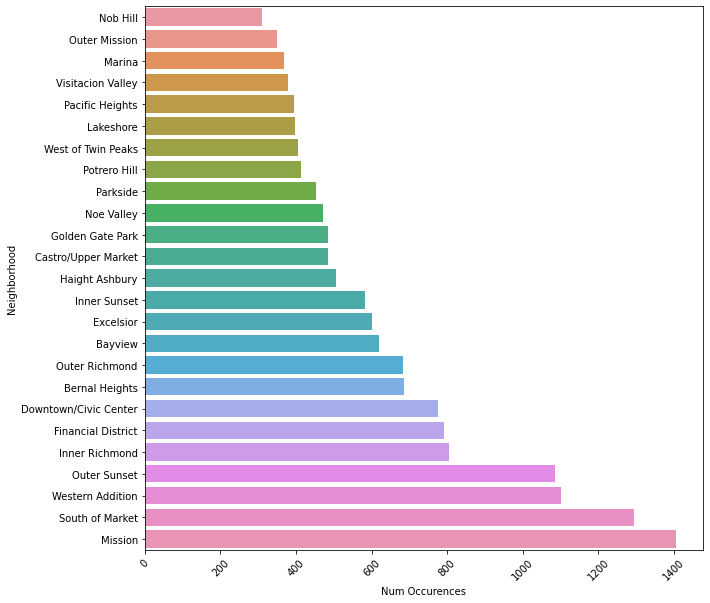

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

g = sf_san.groupby('Neighborhood', {'Num Occurences': agg.COUNT()})
g = g.sort('Num Occurences')
g = g[g['Num Occurences'] > 300]
df = g.to_dataframe()

fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='Num Occurences', y='Neighborhood', data=df, ax=ax)
plt.xticks(rotation=45)

In [ ]:
import folium
from folium.plugins import HeatMap

tiles = 'Stamen Terrain'
m = folium.Map(location=[37.7749, -122.4194],
               zoom_start=9,
               tiles = tiles)
data = []
for r in sf_san:
  point = r['Point'].split(',')
  if len(point) > 1:
    x_val = float(point[0][1:])
    y_val = float(point[1][:-1])
    data.append((x_val, y_val))

HeatMap(data, radius = 20).add_to(m)
m